<a href="https://colab.research.google.com/github/inesbsilveira/2nd-semester-2023/blob/main/WORKING_CODE_IMG_SEGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


epoch,train_loss,valid_loss,time
0,0.434426,0.368956,00:43


epoch,train_loss,valid_loss,time
0,0.347383,0.332858,00:48
1,0.341455,0.333816,00:50
2,0.376250,0.341317,00:53
3,0.377132,0.342871,00:49
4,0.365882,0.341031,00:51
5,0.359161,0.373114,00:49
6,0.355673,0.356470,00:50
7,0.346953,0.338614,00:50
8,0.339734,0.336192,00:50
9,0.335600,0.336116,00:50


<Axes: >

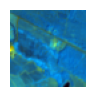

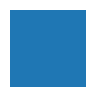

In [ ]:
from fastai.vision.all import *
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

# Define paths
path = Path('/content/drive/MyDrive/AAA')
image_folder = path/'images'
mask_folder = path/'labels1'

# Create DataBlock
def get_items(path):
    image_files = get_image_files(image_folder)
    return image_files

def get_mask_fn(image_file):
    return mask_folder / f'{image_file.stem}_mask1.png'

codes = ['background', 'object']  # Labels in the mask

dblock = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_items,
                   get_y=get_mask_fn,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42))

# Create DataLoaders
dls = dblock.dataloaders(path, bs=8)

# Define U-Net model
learn = unet_learner(dls, resnet34)

# Train the model
learn.fine_tune(10)

# Perform inference on test images
test_dl = dls.test_dl(get_image_files(image_folder))
preds = learn.get_preds(dl=test_dl)

# Display sample predictions
sample_idx = 0
sample_image_path = list(test_dl.items)[sample_idx]
sample_image = PILImage.create(sample_image_path)
sample_pred = preds[0][sample_idx].argmax(dim=0).numpy()

sample_image.show()
TensorImage(sample_pred).show(cmap='tab20')


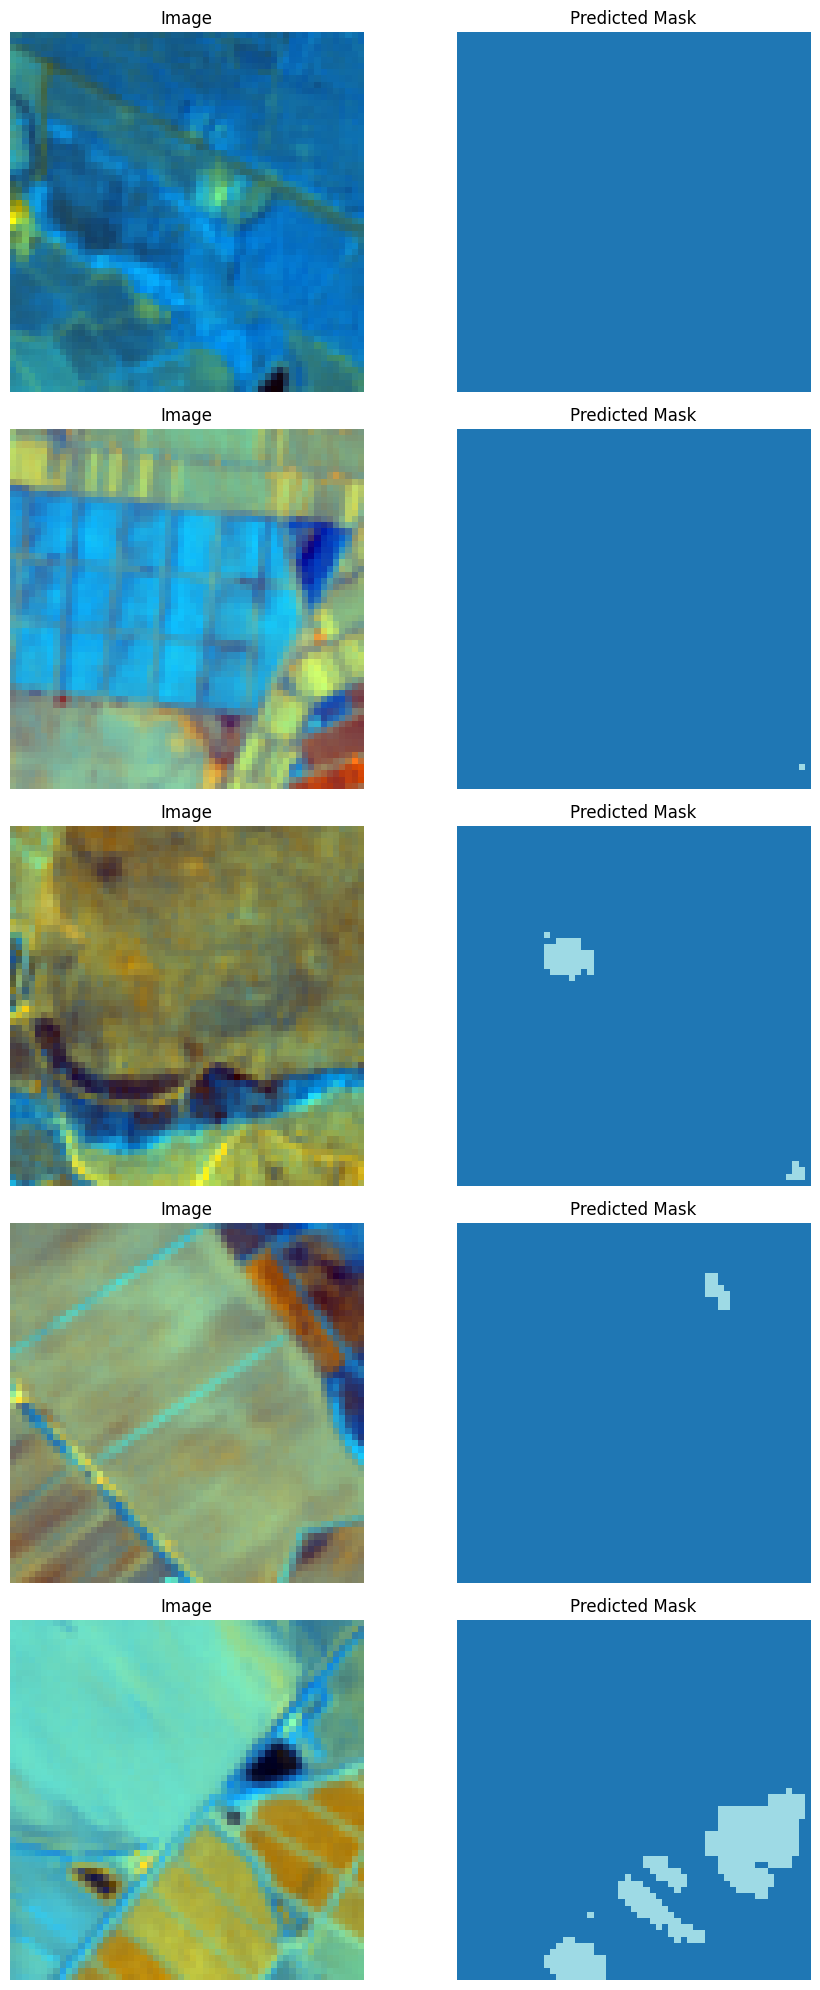

In [ ]:
# Perform inference on test images
test_dl = dls.test_dl(get_image_files(image_folder))
preds = learn.get_preds(dl=test_dl)[0]

# Display sample predictions
sample_indices = [0, 1, 2, 3, 4]

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for i, idx in enumerate(sample_indices):
    sample_image_path = list(test_dl.items)[idx]
    sample_image = PILImage.create(sample_image_path)
    sample_pred = preds[idx].argmax(dim=0).numpy()

    axes[i, 0].imshow(sample_image)
    axes[i, 0].set_title('Image')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(sample_pred, cmap='tab20')
    axes[i, 1].set_title('Predicted Mask')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
